In [1]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torchfile
import imageio.v3 as iio
import glob
import tensorflow as tf

e:\Anaconda\envs\fam\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Natural images

In [2]:
# This should always be adjusted for different purposes
num_kernel = 64
num_stimuli = 9500
num_row = 5
num_col = 5
# overlap = 4
filter_size = [9, 9]

#### load image

In [3]:
all_images = torchfile.load('tr-berkeley-N5K-M56x56-lcn.t7')
crop_size = 25

In [4]:
all_images.shape

(0,)

In [6]:
def sample_from_raw_data(raw, crop_size, std_threshold=0.2, seed=0, ddof=1, num_im=10000):
  # this ddof stuff really should not matter.
  # here I just want to follow what's done in the original code as much as possible.
    assert raw.shape == (5000, 56, 56)
    rng_state = np.random.RandomState(seed=seed)
    # for loop
    collected = 0
    all_imgs = []
    all_img_idx = []
    all_r_idx = []
    all_c_idx = []
    while collected < num_im:
        #if collected % 10000 == 0:
        #    print(collected)
        # randomly select a image
        im_idx = rng_state.randint(5000)
        # then randomly select a patch
        r_idx, c_idx = rng_state.randint(56 - crop_size + 1, size=(2,))
        im_candidate = raw[im_idx, np.newaxis, r_idx:r_idx + crop_size, c_idx:c_idx + crop_size]
        if np.std(im_candidate, ddof=ddof) <= std_threshold:
            continue
        else:
            collected += 1
            # save as float to save space
            all_imgs.append(im_candidate.astype(np.float32))
            all_img_idx.append(im_idx)
            all_r_idx.append(r_idx)
            all_c_idx.append(c_idx)
    
    return {
        'raw_data': raw,
        'data': np.asarray(all_imgs),
        'idx_img': np.asarray(all_img_idx),
        'idx_r': np.asarray(all_r_idx),
        'idx_c': np.asarray(all_c_idx),
    }

In [ ]:
data_dict = sample_from_raw_data(all_images, crop_size)
imgs = data_dict['data'].reshape(10000, crop_size, crop_size)
# plt.imshow(imgs[1000])

#### Some chosen list

In [5]:
# 1000
train_list = [1967,3396,4153,8336,8922,235,6230,6203,5322,7423,8733,2000,7684,2712,2547,9391,704,918,4029,6043,4642,4785,8503,2792,4882,3560,5300,931,7692,5608,5291,8095,7244,4746,2952,4710,7826,5348,4493,2206,3607,6266,6912,4871,360,6201,2098,8463,5761,82,7249,9439,880,678,8842,1996,1360,3834,9883,5642,4298,6873,9144,7407,5655,2464,6704,4327,5927,1694,2499,6570,2496,6876,8959,7945,3672,7745,4399,2547,2987,1809,6245,8755,5846,5987,1130,8570,416,4102,2367,3388,8008,5480,1005,5489,7301,4837,1047,2963,5838,9508,3368,5140,4809,8500,5043,7662,8751,8161,4728,531,1899,737,7948,3600,882,6791,4150,8245,3825,1121,1241,50,7523,337,9404,8648,3872,8644,5550,2586,3437,7833,3356,3403,7446,104,4454,7507,7205,4511,9311,9791,661,6725,5331,8054,5292,219,5804,3720,131,9580,1222,7794,3188,9596,1389,4665,282,6711,515,1549,8444,4749,6382,9991,5021,6289,2545,3039,4079,328,6176,5179,6166,6024,9197,9561,9442,4420,4373,4450,1885,3962,7132,8791,8750,2944,6343,3562,2955,1672,1202,2204,2439,7282,1385,3491,3563,6143,2738,3008,3146,4026,8457,4945,4939,5015,1819,2376,8783,1898,6229,8616,7787,9028,8160,1485,472,6537,963,5643,5799,4126,7412,3926,2997,8326,8213,5231,1680,6507,1993,264,2221,2267,9144,4973,5806,7775,4479,113,9483,5622,1448,2467,5449,7109,8762,7347,2696,4372,2950,2552,644,1686,7449,3459,5324,389,7220,1834,4078,3644,9286,9448,1054,6549,9954,966,3189,2806,3086,8635,8485,2685,9270,452,6181,2671,9953,4478,4887,8302,1333,9124,3441,9705,1876,4399,3231,4747,3909,5357,1384,8938,3690,2472,9923,8596,4530,9506,4295,5986,3292,5643,9353,8090,171,5157,3888,8863,2296,9600,2976,8974,8849,7366,3603,922,451,6330,9195,9251,6758,8375,5326,2891,2427,2713,6135,2738,9582,438,604,5803,9363,2862,8787,9447,6758,431,9315,1023,2621,8393,9274,9001,9611,8330,7418,3164,4544,9233,3034,9850,3394,1561,5772,358,3982,5692,2019,6087,4080,2920,6150,9660,9174,2073,7759,6536,2698,6670,8486,4368,3883,8242,8715,9075,5399,4900,5119,7019,240,1210,9230,6939,1379,6399,9809,133,1732,3828,9317,157,3791,4968,807,1754,5155,154,2233,2340,3776,2847,8546,9457,3543,6056,1564,3697,3403,1386,911,6093,2510,9949,5542,9781,1971,928,2093,1165,2015,9934,2380,8962,8342,981,2033,5740,379,9048,2114,9555,2832,4249,9530,2473,7181,7393,9857,9309,638,3914,9374,8177,8895,7857,7197,8590,8358,1325,129,4666,7911,5958,9721,275,1316,6626,941,4320,9521,5006,2154,561,3116,1066,5760,7346,7425,6034,4918,1783,4359,3294,4093,6192,898,6017,9559,3730,3708,9647,899,8789,166,747,3018,8392,491,8363,4768,7931,1425,5109,9565,4746,223,7290,3266,8562,9478,7899,2808,9210,5068,4090,4873,3991,4518,4904,7837,2674,8673,6363,4774,3443,5,1300,6535,2063,1765,6338,207,8300,3292,2206,9846,9115,4136,81,7108,8926,626,2939,649,7263,4683,3138,9805,4043,9626,2596,5620,2515,5263,8793,7070,3540,9491,7664,5345,1503,1782,1646,8628,6754,1876,9729,8762,4308,9605,2817,3239,6758,8591,1687,3821,7773,8935,5114,2559,5299,3242,6349,9285,8391,530,4712,3958,5617,3548,3738,9237,6563,4080,8847,3959,5939,7784,3618,5198,5391,6712,1322,4105,9420,5267,7435,7413,3898,6652,3920,5593,682,989,5329,2083,4908,4401,7205,9806,453,7529,6181,5495,4236,5090,3754,8013,8918,1593,692,6181,6675,5596,5616,5411,4113,1370,3025,7840,2025,7880,2766,3939,7213,9442,2355,981,2536,5495,6607,2017,6720,8428,3554,3156,4961,8968,3405,6255,8604,93,7435,7196,2783,8161,1494,2837,5935,3648,1856,215,6702,998,4158,4321,9381,1567,7154,4745,133,8745,9888,2424,692,4190,3364,9497,3861,9352,8257,6707,4995,968,7252,2754,7239,2496,1638,7687,9451,8690,3363,6349,147,2125,2451,4898,4850,9566,5304,9462,7641,7545,9544,7643,1607,1066,1762,4846,5027,7275,3177,6135,9787,2693,8371,537,303,3043,1992,6320,633,9888,9463,5734,9000,8187,4454,4442,3068,3594,67,6731,8808,7770,4911,5158,1470,6858,6080,5965,6700,9433,1485,6945,4309,2642,2108,6716,4501,2695,4629,7377,1076,6002,8508,3641,2972,5550,7487,5797,8174,7516,4732,5607,2162,6664,6182,4256,6329,6959,113,9417,5330,6206,8816,6957,535,4118,8191,3538,9602,9686,3551,4836,3008,896,101,8092,8663,5616,322,6074,452,4995,5711,9011,6412,5416,8625,1759,3284,2602,2125,9879,556,7964,5219,2025,4918,5137,3982,8517,1065,1375,6320,4725,5657,6835,4285,7599,3447,3317,5521,3131,7318,5686,1402,4181,7729,6015,2050,2371,3610,2409,8448,7741,8745,5087,2741,9899,8962,3107,5044,6589,5421,42,1362,6872,1283,7593,5966,8196,9758,9159,6984,7261,7684,1658,6977,4272,7720,102,5936,8320,1426,2345,2295,2880,6452,351,6112,362,2506,4449,4474,696,2561,4431,7338,5111,9780,9915,9005,8617,1982,108,1089,6681,2968,3212,4642,8305,4535,3497,1223,5274,5377,9188,338,6782,9511,9140,5311,6616,3457,3011,7532,2207,7517,7228,5462,6318,1860,3380,1594,470,1586,9906,5041,7285,3387,2922,2573,9250,5600,6096,9532,9126,1562,9539,8105,7694,6436,682,6556,1424,8395,1090,3768,53,3979,379,5414,5347,3251,3273,7187,3184,4060,832,7191,6579,5757,8138,694,2380,4429,5882,2756,8289,6548,895,9798,2829,148,5768,136,8012,6963,456,6250,7484,285,2941,6824,3454,4170,4535,8437,3436,4702,467,7599,9774,4506,644,4423,9101,6122,4438,3389]

In [5]:
# random 500
train_list = np.random.choice(10000, 500, replace=False).squeeze()

In [ ]:
# 200
train_list = [8049,3810,2658,7230,4190,8481,9855,2571,1922,7836,8322,3540,8016,9546,7711,2540,3084,6583,2040,7187,101,5410,8459,4486,9628,8277,3662,2118,9380,6601,8775,6493,5988,9121,6881,8880,8412,4519,6711,589,8775,3997,1204,533,8277,1651,4928,4711,7135,3294,4068,231,4610,5813,9582,6681,6864,595,4216,2901,74,8717,8746,4048,2818,5127,4157,3019,2961,906,1564,8584,91,6107,7081,3301,1783,7989,4954,6354,5481,1567,3233,8243,8465,5002,5056,8228,3853,1749,2883,5525,39,6968,4712,3628,5484,1842,4793,7636,782,7690,2780,5545,5357,2164,9339,6868,7147,5314,458,4842,1484,6841,925,9280,1569,9925,8689,2522,6075,3433,2596,7475,372,9172,7176,923,9289,7807,3768,9564,8198,297,7433,2055,928,9004,999,7099,4892,1586,8718,3141,204,3940,5077,5566,6168,79,3924,8190,5667,2198,8255,4791,158,9473,2240,1631,6727,3809,3465,4647,8223,9378,7106,2353,2784,191,2319,4608,8022,8681,2645,6432,2320,2785,7292,5021,3514,918,8805,7999,2789,2975,4908,2869,3830,9321,2201,8475,6897,1202,2936,7895,1808,8895,5777,3034]

In [ ]:
# 50
train_list = [3402, 3042, 2206, 6877, 9926, 3575, 7056, 7277, 2775, 767, 6809, 8015, 9067, 6141, 4696, 5417, 7671, 2316, 3305, 731, 2308, 1295, 408, 9362, 3702, 2391, 7960, 6937, 141, 1941, 5944, 9177, 109, 778, 1358, 8015, 3612, 5312, 9156, 4973, 4612, 1322, 8142, 9364, 1697, 3654, 835, 5180, 7668, 2867]

In [2]:
# Yuqi 78
train_list = [3321, 533, 3656, 9006, 2537, 4740, 7456, 3739, 5525, 5406, 6384, 2617, 3545, 7703, 8529, 8157, 7253, 4341, 2917, 6143, 141, 4125, 9571, 4295, 605, 1795, 6437, 6589, 8397, 1769, 569, 7328, 8241, 9725, 9218, 5263, 3238, 4443, 165, 1469, 7765, 8112, 9650, 2188, 6956, 4363, 5976, 2215, 7364, 8205, 4147, 3589, 2723, 8900, 7490, 7502, 7681, 1276, 5517, 9382, 3055, 6344, 7822, 4706, 7960, 4563, 3161, 3559, 6494, 138, 2086, 7424, 9682, 4907, 9826, 7999, 5844, 4969, ]

In [ ]:
imgs = imgs[train_list]

#### Get filters

In [7]:
# Get kernels
filters = np.load("filter_256.npy")

In [8]:
filter_list = np.random.choice(256, num_kernel, replace=False).squeeze()
filters = filters[filter_list]

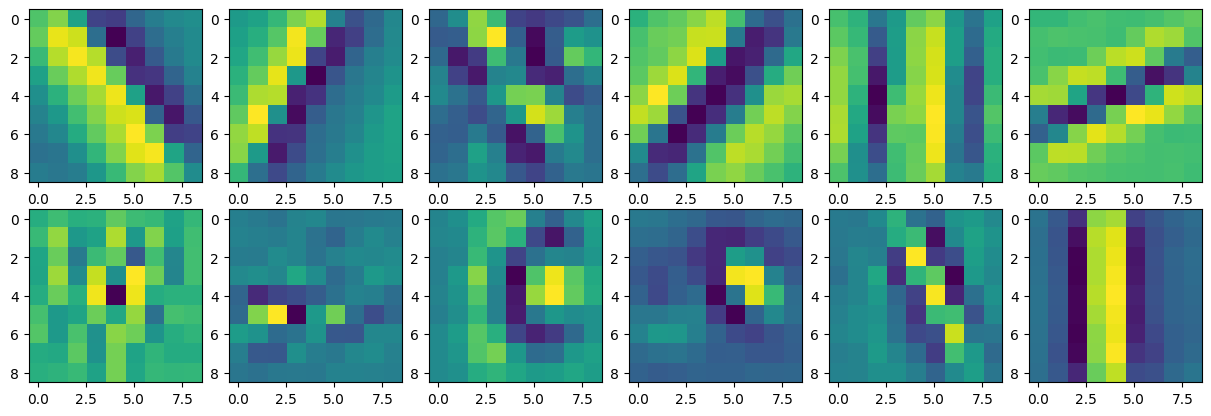

In [10]:
fig, axs = plt.subplots(2, 6, constrained_layout=True, figsize=(12, 4))
axs = axs.flatten()
for i, filter in enumerate(filters[:12]):
    axs[i].imshow(filter.reshape(9, 9))

plt.show()

#### Encode

In [ ]:
imgs = np.expand_dims(imgs, -1)
response = np.zeros((num_kernel, num_stimuli, num_row, num_col))
for i, f in enumerate(filters):
    kernel = f.reshape(9,9,1,1)
    # tmp = (tf.nn.conv2d(imgs, kernel, strides=[1, 4, 4, 1], padding='VALID').numpy()).reshape(num_stimuli, num_row, num_col)
    tmp = tf.nn.conv2d(imgs, kernel, strides=[1, 4, 4, 1], padding='VALID').numpy()
    tmp = tmp.reshape(num_stimuli, num_row, num_col)
    response[i] = tmp
response = response.transpose(1, 0, 2, 3)

In [12]:
# train_list = np.random.choice(10000, 300, replace=False)
num_stimuli = len(train_list)
r_in = response[train_list]

In [13]:
# r_in = np.absolute(response)
r_in = np.abs(r_in)
# r_in *= 60
r_in.shape

(1000, 256, 5, 5)

In [14]:
np.save('tr_berkeley/r_in_abs_1000_256_5_5.npy', r_in)

#### Threshold based on ff rates

In [26]:
r_in_f = r_in.reshape(num_stimuli, -1)
theta_BCM = (r_in_f ** 2).mean(0)
theta_BCM = theta_BCM * 3.6
# check BCM threshold (for each neuron only 5% of stimuli will be above the threshold)
r_in_sorted = np.flip(np.sort(r_in_f, 0), 0)
high_r = np.sum(r_in_sorted > theta_BCM, axis=0)

/tmp/ipykernel_30921/3816854572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_r)


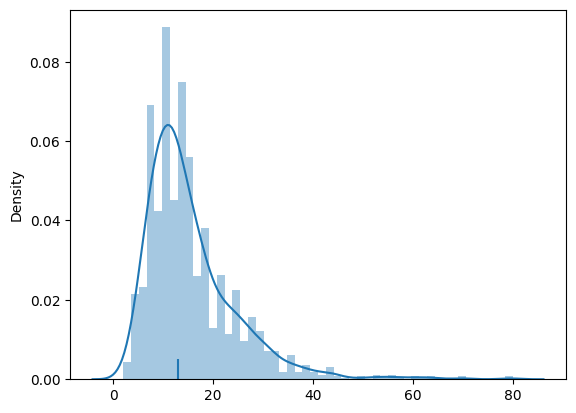

In [27]:
sns.distplot(high_r)
plt.vlines(np.median(high_r),0, 0.005)

In [ ]:
np.save('tr_berkeley/r_in_bcm_theta_300_72_5_5.npy', theta_BCM)